Use KNN (K-Nearest Neighbours to predict the category of customers, and evaluate the accuracy of your model.

In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [10]:
file_name = 'dataset/teleCust1000t.csv'
!wget -nc -O $file_name https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

File `dataset/teleCust1000t.csv' already there; not retrieving.


In [11]:
# get model for classification 'custcat'
df = pd.read_csv(file_name)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


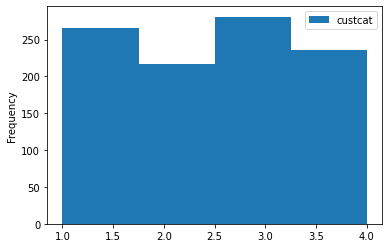

In [12]:
df.plot.hist(y='custcat', bins=4)

In [13]:
# data preparation
full_X = df.loc[:, df.columns != 'custcat']
full_X = preprocessing.StandardScaler().fit_transform(full_X.astype(float)) #normalize
full_Y = df['custcat']

from sklearn.model_selection import train_test_split as tt_split
x_train, x_test, y_train, y_test = tt_split(full_X, full_Y, test_size=0.2, random_state=4)

In [27]:
# train and predict
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
y_hat = neigh.predict(x_test)

In [28]:
# evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print("Train set Accuracy: ", metrics.jaccard_score(y_test, y_hat, average=None))
print("Test set Accuracy: ", neigh.score(x_test, y_test))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32
Train set Accuracy:  [0.2254902  0.21052632 0.18390805 0.12676056]
Test set Accuracy:  0.32


In [55]:
# get the best 'k'
k_num = 10
mean_list = np.zeros(k_num)

for k in range(1, k_num + 1):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    y_hat = neigh.predict(x_test)
    mean_list[k-1] = metrics.accuracy_score(y_test, y_hat)
    
print(mean_list)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34  0.33 ]


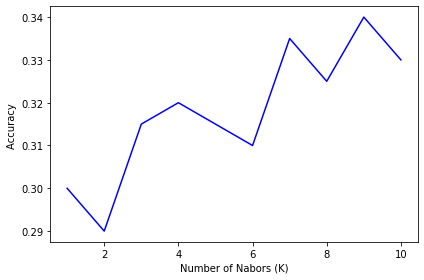

In [59]:
plt.plot(range(1, k_num + 1), mean_list, '-b')
# plt.fill_between(range(1, k_num), mean_list - 1 * std_list, mean_list + 1 * std_list, alpha=0.10)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()